In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
df=pd.read_csv('gurgaon_properties_missing_value.csv')

In [280]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
0,flat,signature global park 4,Sector 36 Sohna,0.82,7586.0,3.0,2,2,2.0,new property,850.0,0,0,0,0,0,1,8
1,flat,smart world gems,Sector 89,0.95,8597.0,2.0,2,2,4.0,new property,1226.0,1,1,0,0,0,1,38
2,flat,breez global hill view,Sohna,0.32,5470.0,2.0,2,1,17.0,new property,1000.0,0,0,0,0,0,1,49
3,flat,bestech park view sanskruti,Sector 92,1.60,8020.0,3.0,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,2,174
4,flat,suncity avenue,Sector 102,0.48,9023.0,2.0,2,1,5.0,Relatively New,582.0,0,0,0,1,0,1,159


In [281]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
pooja room         0
store room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [282]:
train_df=df.drop(columns=['society','price_per_sqft'])

In [283]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
0,flat,Sector 36 Sohna,0.82,3.0,2,2,2.0,new property,850.0,0,0,0,0,0,1,8
1,flat,Sector 89,0.95,2.0,2,2,4.0,new property,1226.0,1,1,0,0,0,1,38
2,flat,Sohna,0.32,2.0,2,1,17.0,new property,1000.0,0,0,0,0,0,1,49
3,flat,Sector 92,1.60,3.0,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,2,174
4,flat,Sector 102,0.48,2.0,2,1,5.0,Relatively New,582.0,0,0,0,1,0,1,159


# luxury score


<Axes: ylabel='luxury_score'>

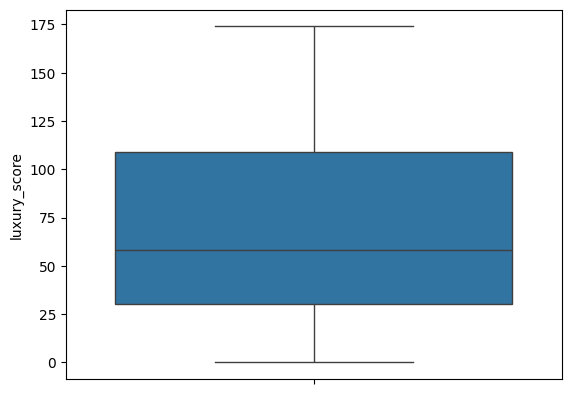

In [284]:
sns.boxplot(df['luxury_score'])

In [285]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return'low'
    elif 50 <= score <125:
        return 'medium'
    elif 125 <= score <= 175:
        return 'high'
    else:
        return None

In [286]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [287]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score,luxury_category
0,flat,Sector 36 Sohna,0.82,3.0,2,2,2.0,new property,850.0,0,0,0,0,0,1,8,low
1,flat,Sector 89,0.95,2.0,2,2,4.0,new property,1226.0,1,1,0,0,0,1,38,low
2,flat,Sohna,0.32,2.0,2,1,17.0,new property,1000.0,0,0,0,0,0,1,49,low
3,flat,Sector 92,1.60,3.0,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,2,174,high
4,flat,Sector 102,0.48,2.0,2,1,5.0,Relatively New,582.0,0,0,0,1,0,1,159,high


# floorNum

<Axes: ylabel='floorNum'>

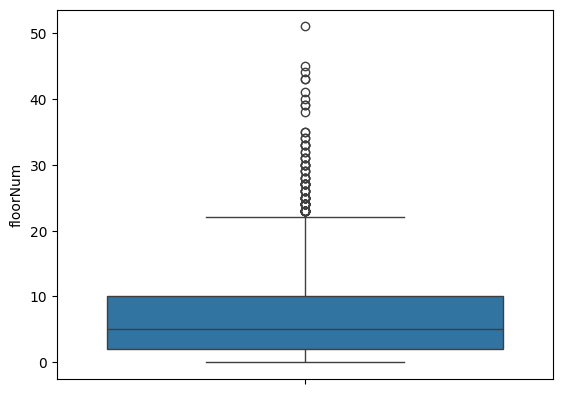

In [288]:
sns.boxplot(df['floorNum'])

In [289]:
def categorize_floor(floor):
    if 0 <= floor <=2:
        return 'low_floor'
    elif 3<= floor <=10:
        return 'medium floor'
    elif 11<= floor <=51:
        return 'high floor'
    else:
        return None

In [290]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [324]:
train_df.head(10)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_category,floor_category
0,flat,Sector 36 Sohna,0.82,3.0,2,2,new property,850.00,0,0,0,0,0,1,low,low_floor
1,flat,Sector 89,0.95,2.0,2,2,new property,1226.00,1,1,0,0,0,1,low,medium floor
2,flat,Sohna,0.32,2.0,2,1,new property,1000.00,0,0,0,0,0,1,low,high floor
3,flat,Sector 92,1.60,3.0,4,3+,Relatively New,1615.00,0,1,0,0,1,2,high,medium floor
4,flat,Sector 102,0.48,2.0,2,1,Relatively New,582.00,0,0,0,1,0,1,high,medium floor
5,flat,Gwal Pahari,7.50,4.0,4,3+,new property,4842.00,0,1,1,0,1,2,low,high floor
6,flat,Sector 108,2.00,3.0,3,3+,Relatively New,2116.00,0,1,0,0,0,1,medium,high floor
7,flat,Sector 102,1.90,3.0,4,3,Relatively New,1710.00,0,1,0,0,0,1,high,medium floor
8,house,Rajendra Park,1.20,3.0,2,1,Old Property,1185.51,0,0,0,0,0,1,low,low_floor
9,house,Sector 26,4.50,3.0,3,2,Moderately Old,1350.00,1,1,0,0,0,1,medium,low_floor


In [292]:
train_df.drop(columns=['luxury_score','floorNum'],inplace=True)

In [337]:
train_df.head(10)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_category,floor_category
0,flat,Sector 36 Sohna,0.82,3.0,2,2,new property,850.00,0,0,0,0,0,1,low,low_floor
1,flat,Sector 89,0.95,2.0,2,2,new property,1226.00,1,1,0,0,0,1,low,medium floor
2,flat,Sohna,0.32,2.0,2,1,new property,1000.00,0,0,0,0,0,1,low,high floor
3,flat,Sector 92,1.60,3.0,4,3+,Relatively New,1615.00,0,1,0,0,1,2,high,medium floor
4,flat,Sector 102,0.48,2.0,2,1,Relatively New,582.00,0,0,0,1,0,1,high,medium floor
5,flat,Gwal Pahari,7.50,4.0,4,3+,new property,4842.00,0,1,1,0,1,2,low,high floor
6,flat,Sector 108,2.00,3.0,3,3+,Relatively New,2116.00,0,1,0,0,0,1,medium,high floor
7,flat,Sector 102,1.90,3.0,4,3,Relatively New,1710.00,0,1,0,0,0,1,high,medium floor
8,house,Rajendra Park,1.20,3.0,2,1,Old Property,1185.51,0,0,0,0,0,1,low,low_floor
9,house,Sector 26,4.50,3.0,3,2,Moderately Old,1350.00,1,1,0,0,0,1,medium,low_floor


In [338]:
df['agePossession'].value_counts()

agePossession
Relatively New        1794
Moderately Old         675
new property           597
Old Property           357
Under Construction     281
undefined                1
Name: count, dtype: int64

In [294]:
pip install -U scikit-learn

In [295]:
# label encoding
from sklearn.preprocessing import OrdinalEncoder
# create a copy of the original data for label encoding
data_label= train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

In [296]:
# apply label encoding to categorial columns
for col in categorical_cols:
    oe= OrdinalEncoder()
    data_label[col] = oe.fit_transform(data_label[[col]])
    print(oe.categories_)

[array(['flat', 'house'], dtype=object)]
[array([', Delhi NCR', 'A Block Sushant Lok Phase 1', 'Acharya Puri',
       'Adarsh Nagar', 'Alipur', 'Ambience Island',
       'Anand Garden, Sector-105', 'Ansal Plaza', "Ansal's Palam Vihar",
       'Arjun Nagar', 'Ashok Vihar', 'Ashok Vihar Phase 2',
       'Ashok Vihar Phase 3', 'Ashok Vihar Phase 3 Extension',
       'Ashok Vihar Phase I', 'B Block Sushant Lok Phase 1',
       'B1 Block Sector 57', 'BPTP', 'Baldev Nagar', 'Begampur Khatola',
       'Bhawani Enclave', 'Bhim Nagar', 'Bhimgarh Kheri Phase 3',
       'Bhondsi', 'Bhora Kalan', 'Bissar', 'Block A Surya Vihar',
       'Block G Sector-57', 'Block H Ashok Vihar Phase III Extension',
       'C Block Sushant Lok Phase 1', 'Carterpuri Village', 'Chakkarpur',
       'Civil L', 'Cyber City', 'DLF Phase 1', 'DLF Phase 2',
       'DLF Phase 3', 'DLF Phase 4', 'DLF Phase 5', 'Damdma',
       'Daulatabad', 'Dayanand Colony', 'Devilal Colony', 'Dhankot',
       'Dharam Colony', 'Dwarka Expre

In [297]:
# spliting the data set into traing and test set
x_label =data_label.drop('price',axis =1)
y_label = data_label['price']

In [298]:
x_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_category,floor_category
0,0.0,170.0,3.0,2,2.0,4.0,850.0,0,0,0,0,0,1,1.0,1.0
1,0.0,235.0,2.0,2,2.0,4.0,1226.0,1,1,0,0,0,1,1.0,2.0
2,0.0,262.0,2.0,2,1.0,4.0,1000.0,0,0,0,0,0,1,1.0,0.0
3,0.0,240.0,3.0,4,4.0,2.0,1615.0,0,1,0,0,1,2,0.0,2.0
4,0.0,127.0,2.0,2,1.0,2.0,582.0,0,0,0,1,0,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,1.0,134.0,5.0,5,4.0,2.0,6228.0,1,1,1,1,0,1,0.0,1.0
3701,0.0,154.0,1.0,1,1.0,0.0,665.0,0,0,0,0,0,2,2.0,2.0
3702,1.0,15.0,5.0,6,3.0,0.0,5490.0,1,1,1,1,0,1,2.0,2.0
3703,1.0,4.0,1.0,1,0.0,2.0,876.0,0,0,0,0,0,1,1.0,1.0


In [299]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3700     6.00
3701     0.60
3702    15.50
3703     0.13
3704     1.78
Name: price, Length: 3705, dtype: float64

# correlation analysis

<Axes: >

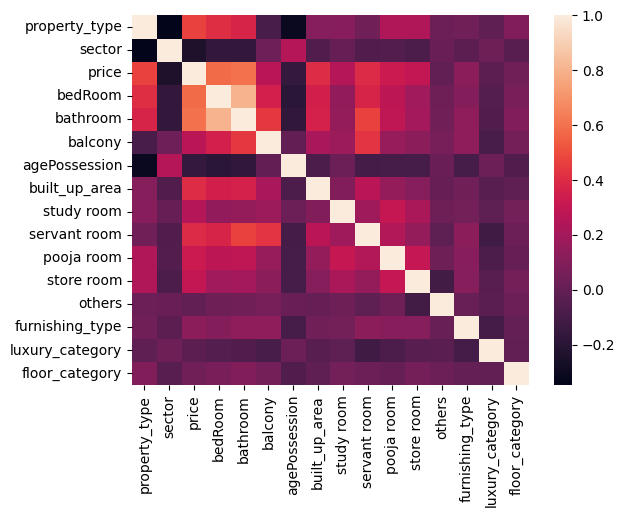

In [300]:
sns.heatmap(data_label.corr())

In [301]:
fg_df1 = data_label.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fg_df1

,feature,corr_coeff
0,sector,-0.242177
1,price,1.000000
2,bedRoom,0.583249
3,bathroom,0.599833
4,balcony,0.270824
5,agePossession,-0.163001
6,built_up_area,0.405061
7,study room,0.252036
8,servant room,0.395033
9,pooja room,0.323529


# random forest

In [302]:
from sklearn.ensemble import RandomForestRegressor
# train a random forest regerssor 
rf_label= RandomForestRegressor(n_estimators=100, random_state =42)
rf_label.fit(x_label, y_label)

RandomForestRegressor(random_state=42)

In [303]:
# extract feature importance score from label data
fg_df2 = pd.DataFrame({'feature':x_label.columns,'rf_importance':rf_label.feature_importances_}).sort_values(by= 'rf_importance',ascending=False)
fg_df2

,feature,rf_importance
6,built_up_area,0.534446
1,sector,0.128844
2,bedRoom,0.095289
0,property_type,0.071660
3,bathroom,0.046905
8,servant room,0.036607
4,balcony,0.017475
5,agePossession,0.016041
12,furnishing_type,0.013163
13,luxury_category,0.011128


# gradient boosting

In [304]:
from sklearn.ensemble import GradientBoostingRegressor

# train a random forest regressor on lable encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(x_label,y_label)

GradientBoostingRegressor()

In [305]:
# extract feature importance sore 
fg_df3 = pd.DataFrame({'feature':x_label.columns,'gb_importance':gb_label.feature_importances_}).sort_values(by='gb_importance',ascending=False)
fg_df3

,feature,gb_importance
6,built_up_area,0.536966
1,sector,0.135918
2,bedRoom,0.096808
0,property_type,0.094786
3,bathroom,0.061676
8,servant room,0.047803
7,study room,0.011120
5,agePossession,0.004086
10,store room,0.003432
13,luxury_category,0.002781


# lasso regression

In [306]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# standaridize the feature
scaler= StandardScaler()
x_scaled = scaler.fit_transform(x_label)

In [307]:
# train lasso model
lasso = Lasso(alpha=0.01,random_state=42)
lasso.fit(x_scaled,y_label)

Lasso(alpha=0.01, random_state=42)

In [308]:
# extract coefficent
fg_df4= pd.DataFrame({'feature':x_label.columns,'lasso_coeff': lasso.coef_}).sort_values(by='lasso_coeff',ascending=False)
fg_df4

,feature,lasso_coeff
0,property_type,0.733065
6,built_up_area,0.524119
3,bathroom,0.522955
2,bedRoom,0.443992
8,servant room,0.382392
7,study room,0.255410
10,store room,0.228634
9,pooja room,0.125418
13,luxury_category,0.091935
5,agePossession,0.091394


# linear regerssion

In [309]:
from sklearn.linear_model import LinearRegression
# train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(x_scaled ,y_label)

LinearRegression()

In [310]:
# extract coeff
fg_df5 = pd.DataFrame({'feature': x_label.columns,'reg_coef':lin_reg.coef_}).sort_values(by='reg_coef',ascending=False)

In [311]:
fg_df5

,feature,reg_coef
0,property_type,0.744540
6,built_up_area,0.529899
3,bathroom,0.518968
2,bedRoom,0.445822
8,servant room,0.387125
7,study room,0.260106
10,store room,0.231553
9,pooja room,0.129030
5,agePossession,0.108766
13,luxury_category,0.104338


In [312]:
final_df = fg_df1.merge(fg_df2,on='feature').merge(fg_df3,on='feature').merge(fg_df4,on='feature').merge(fg_df5,on='feature')

In [313]:
final_df

,feature,corr_coeff,rf_importance,gb_importance,lasso_coeff,reg_coef
0,sector,-0.242177,0.128844,0.135918,-0.206098,-0.216282
1,bedRoom,0.583249,0.095289,0.096808,0.443992,0.445822
2,bathroom,0.599833,0.046905,0.061676,0.522955,0.518968
3,balcony,0.270824,0.017475,0.001782,0.077170,0.085621
4,agePossession,-0.163001,0.016041,0.004086,0.091394,0.108766
5,built_up_area,0.405061,0.534446,0.536966,0.524119,0.529899
6,study room,0.252036,0.008710,0.011120,0.255410,0.260106
7,servant room,0.395033,0.036607,0.047803,0.382392,0.387125
8,pooja room,0.323529,0.004380,0.000000,0.125418,0.129030
9,store room,0.295279,0.005044,0.003432,0.228634,0.231553


In [314]:
print(final_df.dtypes)


feature           object
corr_coeff       float64
rf_importance    float64
gb_importance    float64
lasso_coeff      float64
reg_coef         float64
dtype: object


In [315]:
# Ensure numeric values
cols = ['corr_coeff', 'rf_importance', 'gb_importance', 'lasso_coeff', 'reg_coef']
final_df[cols] = final_df[cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Compute row-wise mean and sort
sorted_means = final_df[cols].mean(axis=1).sort_values(ascending=False)

# Display result
print(sorted_means)


5     0.506098
2     0.350067
1     0.333032
7     0.249792
6     0.157476
9     0.152789
8     0.116471
3     0.090574
11    0.055581
12    0.037504
4     0.011457
13   -0.011193
10   -0.025446
0    -0.079959
dtype: float64


In [336]:
x_label.head(20)

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_category,floor_category
0,0.0,170.0,3.0,2,2.0,4.0,850.00,0,0,0,0,0,1,1.0,1.0
1,0.0,235.0,2.0,2,2.0,4.0,1226.00,1,1,0,0,0,1,1.0,2.0
2,0.0,262.0,2.0,2,1.0,4.0,1000.00,0,0,0,0,0,1,1.0,0.0
3,0.0,240.0,3.0,4,4.0,2.0,1615.00,0,1,0,0,1,2,0.0,2.0
4,0.0,127.0,2.0,2,1.0,2.0,582.00,0,0,0,1,0,1,0.0,2.0
5,0.0,57.0,4.0,4,4.0,4.0,4842.00,0,1,1,0,1,2,1.0,0.0
6,0.0,133.0,3.0,3,4.0,2.0,2116.00,0,1,0,0,0,1,2.0,0.0
7,0.0,127.0,3.0,4,3.0,2.0,1710.00,0,1,0,0,0,1,0.0,2.0
8,1.0,111.0,3.0,2,1.0,1.0,1185.51,0,0,0,0,0,1,1.0,1.0
9,1.0,161.0,3.0,3,2.0,0.0,1350.00,1,1,0,0,0,1,2.0,1.0


In [335]:
df.head(20)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
0,flat,signature global park 4,Sector 36 Sohna,0.82,7586.0,3.0,2,2,2.0,new property,850.00,0,0,0,0,0,1,8
1,flat,smart world gems,Sector 89,0.95,8597.0,2.0,2,2,4.0,new property,1226.00,1,1,0,0,0,1,38
2,flat,breez global hill view,Sohna,0.32,5470.0,2.0,2,1,17.0,new property,1000.00,0,0,0,0,0,1,49
3,flat,bestech park view sanskruti,Sector 92,1.60,8020.0,3.0,4,3+,10.0,Relatively New,1615.00,0,1,0,0,1,2,174
4,flat,suncity avenue,Sector 102,0.48,9023.0,2.0,2,1,5.0,Relatively New,582.00,0,0,0,1,0,1,159
5,flat,paras quartier,Gwal Pahari,7.50,14019.0,4.0,4,3+,20.0,new property,4842.00,0,1,1,0,1,2,49
6,flat,experion the heartsong,Sector 108,2.00,8554.0,3.0,3,3+,14.0,Relatively New,2116.00,0,1,0,0,0,1,95
7,flat,adani m2k oyster grande,Sector 102,1.90,9104.0,3.0,4,3,8.0,Relatively New,1710.00,0,1,0,0,0,1,165
8,house,independent,Rajendra Park,1.20,10118.0,3.0,2,1,2.0,Old Property,1185.51,0,0,0,0,0,1,9
9,house,dlf city phase 1,Sector 26,4.50,33333.0,3.0,3,2,2.0,Moderately Old,1350.00,1,1,0,0,0,1,70


In [317]:
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, x_label, y_label, cv=5,scoring='r2')

In [318]:
scores.mean()

np.float64(0.7542128010346872)

In [319]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, x_label.drop(columns=['study room', 'pooja room', 'others']), y_label, cv=5, scoring='r2')

In [320]:
scores.mean()

np.float64(0.7545984212962653)

In [321]:
export_df = x_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [322]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'gurgaon_properties_post_feature_selection.csv'

In [ ]:
export_df